# THE MNIST DATABASE of handwritten digits

All data came from [MNIST](http://yann.lecun.com/exdb/mnist/)

The MNIST training set is composed of 30,000 patterns from SD-3 and 30,000 patterns from SD-1. Our test set was composed of 5,000 patterns from SD-3 and 5,000 patterns from SD-1. The 60,000 pattern training set contained examples from approximately 250 writers. We made sure that the sets of writers of the training set and test set were disjoint.

SD-1 contains 58,527 digit images written by 500 different writers. In contrast to SD-3, where blocks of data from each writer appeared in sequence, the data in SD-1 is scrambled. Writer identities for SD-1 is available and we used this information to unscramble the writers. We then split SD-1 in two: characters written by the first 250 writers went into our new training set. The remaining 250 writers were placed in our test set. Thus we had two sets with nearly 30,000 examples each. The new training set was completed with enough examples from SD-3, starting at pattern # 0, to make a full set of 60,000 training patterns. Similarly, the new test set was completed with SD-3 examples starting at pattern # 35,000 to make a full set with 60,000 test patterns. Only a subset of 10,000 test images (5,000 from SD-1 and 5,000 from SD-3) is available on this site. The full 60,000 sample training set is available.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mnistReader as mnist
import random

trainData = mnist.read_train_data()
taskData = mnist.read_task_data()

# magic!!
%matplotlib inline

## Show the MNIST Data

In [27]:

def showMNISTData(datas):
    """
    show 10 datas
    the data is the shape of (imgs, labels)
    """
    imgs, labs = datas
    N, W, H = imgs.shape
    plt.rcParams['image.cmap'] = 'gray'
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(imgs[i])
        plt.title('%d'%labs[i])
        plt.gca().axis('off')
    plt.show()    

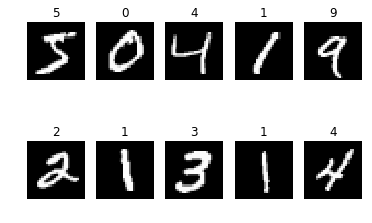

In [28]:
showMNISTData(trainData)

In [2]:
from utils.layers import *
import importlib
import model
from model import NNModel

In [9]:
importlib.reload(model)
import model
from model import NNModel
# trainData[0].shape = (60000,28,28)
# trainData[1].shape = (60000,)
# the NNModel already have his structure
nn = NNModel()

## build a model

let's make a 2 layer model
FC->ReLU->FC->ReLU->SVM

In [13]:
nn = NNModel()

epochs 10 loss 2443.79333158 accuracy 0.983783333333
epochs 20 loss 1422.6283682 accuracy 0.988216666667
epochs 30 loss 779.559123939 accuracy 0.992366666667
epochs 40 loss 469.006572991 accuracy 0.993766666667
epochs 50 loss 253.628625542 accuracy 0.995916666667
epochs 60 loss 142.72688889 accuracy 0.997333333333
epochs 70 loss 79.0515341779 accuracy 0.998133333333
epochs 80 loss 46.7426268906 accuracy 0.998716666667
epochs 90 loss 35.844225016 accuracy 0.998983333333
epochs 100 loss 12.7079529188 accuracy 0.999733333333
epochs 110 loss 5.30391341328 accuracy 0.999883333333
epochs 120 loss 2.786577755 accuracy 0.999933333333
epochs 130 loss 0.607156517569 accuracy 0.999866666667
epochs 140 loss 0.0 accuracy 1.0
epochs 150 loss 0.0 accuracy 1.0
epochs 160 loss 0.0 accuracy 1.0
epochs 170 loss 0.0 accuracy 1.0
epochs 180 loss 0.0 accuracy 1.0
epochs 190 loss 0.0 accuracy 1.0
epochs 200 loss 0.0 accuracy 1.0


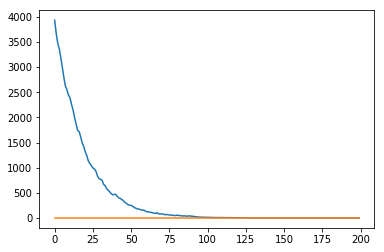

In [16]:
loss, acc = nn.train(trainData[0], trainData[1], 200, batchs=1000, learning_rate=1e-3, display_per_epoch=10)
plt.plot(np.array(loss))
plt.plot(np.array(acc))
plt.show()

## Test the data

In [17]:
out = nn.runModel(trainData[0])
outLab = np.argmax(out, axis=1)
result = np.sum(outLab == trainData[1])
print((result/60000) * 100, '%')

100.0 %


[7 3 2 0 9 8 6 6 2 1]
[7 3 2 0 9 8 6 6 2 1]


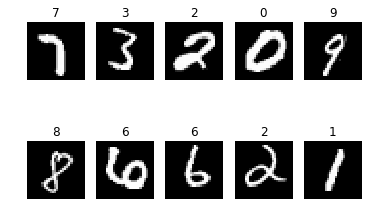

In [29]:
# test train data first
inddx = np.random.choice(60000, 10)
sampedImg = trainData[0][inddx]
sampedLab = trainData[1][inddx]
out = nn.runModel(sampedImg)
outLab = np.argmax(out, axis=1)
print(outLab)
print(sampedLab)
showMNISTData((sampedImg, outLab))

In [36]:
out = nn.runModel(taskData[0])
outLab = np.argmax(out, axis=1)
result = np.sum(outLab == taskData[1])
print((result/10000) * 100, '%')

94.81 %


[6 6 8 5 7 1 9 8 1 9]
[6 6 8 5 7 1 9 9 1 9]


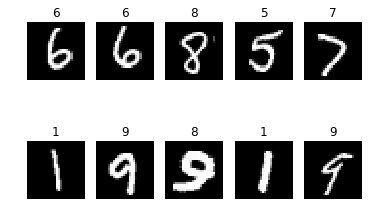

In [35]:
# test task data
inddx = np.random.choice(10000, 10)
sampedImg = taskData[0][inddx]
sampedLab = taskData[1][inddx]
out = nn.runModel(sampedImg)
outLab = np.argmax(out, axis=1)
print(outLab)
print(sampedLab)
showMNISTData((sampedImg, outLab))

## save model


In [42]:
import pickle
with open("model_trained.nn", 'wb') as f:                     # open file with write-mode
    picklestring = pickle.dump(nn, f)   # serialize and save object


In [43]:
nn_check = None
with open("model_trained.nn", 'rb') as f:
    nn_check = pickle.load(f)   # read file and build object

[5 6 2 7 5 1 9 7 7 4]
[5 6 2 7 5 1 9 7 7 4]


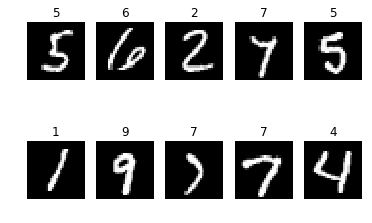

In [44]:
inddx = np.random.choice(10000, 10)
sampedImg = taskData[0][inddx]
sampedLab = taskData[1][inddx]
out = nn_check.runModel(sampedImg)
outLab = np.argmax(out, axis=1)
print(outLab)
print(sampedLab)
showMNISTData((sampedImg, outLab))